In [1]:
import pandas as pd
import numpy as np

In [2]:
temp_df = pd.read_csv("C:\\Users\\Лев\\Projects\\Diploma\\sbp2.csv", sep=';')
temp_df['T'] = temp_df['T'].ffill()
temp_df['time'] = pd.to_datetime(temp_df['time'], dayfirst=True)
temp_df = temp_df.sort_values(by=['time'])
date_temp_df = temp_df.copy(deep=True)
date_temp_df['time'] = date_temp_df['time'].dt.date
date_temp_df = date_temp_df.groupby('time')['T'].mean()
# date_temp_df = pd.DataFrame(date_temp_df)
date_temp_df.index = pd.date_range(start=date_temp_df.index[0], periods=len(date_temp_df.index), freq='D')

In [3]:
from sktime.forecasting.model_selection import temporal_train_test_split

dtd_train, dtd_test = temporal_train_test_split(date_temp_df, test_size=365)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plot_acf(dtd_train)
plot_pacf(dtd_train)

In [63]:
import pmdarima as pm

arima_model = pm.ARIMA(order=(6,1,2))
arima_model.fit(dtd_train)

ARIMA(order=(6, 1, 2))

In [ ]:
plot_acf(arima_model.resid())
plot_pacf(arima_model.resid())

In [ ]:
arima_model.summary()

In [42]:
import warnings 
warnings.filterwarnings('ignore')

In [75]:
def mae(y_true, y_pred): 
    return np.mean(np.abs(y_true - y_pred))

In [ ]:
results = np.array([arima_model.predict(n_periods=7)])

for i in range(358):
    if i % 10 == 0:
        print(i / 358)
    arima_model.update(dtd_test[i:i+1], maxiter=0)
    results = np.append(results, [arima_model.predict(n_periods=7)], axis=0)

In [72]:
results_1day = pd.Series(results[:,0])
results_1day.index = dtd_test[:359].index

1.8604628835500037

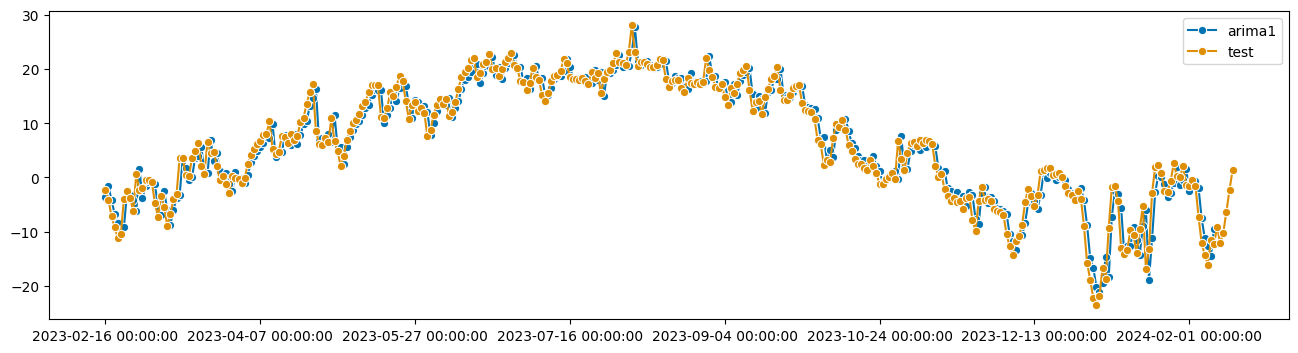

In [76]:
from sktime.utils.plotting import plot_series

plot_series(results_1day, dtd_test, labels = ['arima1', 'test'])
mae(results_1day, dtd_test[:359])

In [ ]:
results_2day = pd.Series(results[:,1])
results_2day.index = dtd_test[1:360].index

plot_series(results_2day, dtd_test, labels = ['arima1', 'test'])
mae(results_2day, dtd_test[1:360])

In [80]:
maes = [mae(results[:,i], dtd_test[i:359 + i]) for i in range(7)]


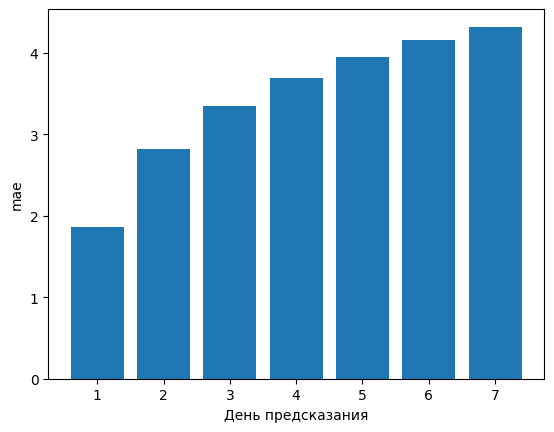

In [84]:
import matplotlib.pyplot as plt

plt.bar(x=[1,2,3,4,5,6,7], height=maes)
plt.xlabel("День предсказания")
plt.ylabel("mae")
plt.show()